### Source Data form National Center for Enviornmental Information

In [77]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'C:\Users\chris\DSC680-T301\DSC680-T301\Weather.csv') 
df.head()

,STATION,DATE,AWND,DYFG,DYTS,PRCP,TAVG,TMAX,TMIN
0,USW00094908,2010-01,9.6,22.0,NaN,1.77,15.2,21.3,9.2
1,USW00094908,2010-02,8.3,18.0,NaN,0.86,20.4,28.5,12.3
2,USW00094908,2010-03,8.5,15.0,1.0,1.05,40.6,50.0,31.2
3,USW00094908,2010-04,11.2,9.0,4.0,5.78,53.9,64.7,43.0
4,USW00094908,2010-05,9.2,14.0,3.0,4.79,59.8,69.9,49.6


In [78]:
df.shape

(157, 9)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  157 non-null    object 
 1   DATE     157 non-null    object 
 2   AWND     157 non-null    float64
 3   DYFG     156 non-null    float64
 4   DYTS     111 non-null    float64
 5   PRCP     157 non-null    float64
 6   TAVG     156 non-null    float64
 7   TMAX     156 non-null    float64
 8   TMIN     157 non-null    float64
dtypes: float64(7), object(2)
memory usage: 11.2+ KB


In [80]:
df.describe()

,AWND,DYFG,DYTS,PRCP,TAVG,TMAX,TMIN
count,157.000000,156.000000,111.000000,157.000000,156.000000,156.000000,157.000000
mean,9.854140,13.782051,4.360360,3.304331,47.644231,56.941026,38.186624
std,1.817736,5.835702,3.100712,2.583855,19.449595,20.333779,18.694446
min,5.600000,1.000000,1.000000,0.390000,9.500000,19.000000,-0.900000
25%,8.500000,9.750000,2.000000,1.540000,30.325000,37.775000,23.100000
50%,10.100000,14.000000,4.000000,2.620000,49.050000,59.200000,38.700000
75%,11.400000,18.000000,6.000000,4.200000,66.450000,76.600000,57.400000
max,14.100000,27.000000,13.000000,16.010000,78.200000,89.900000,66.800000


### Exploratory data analysis

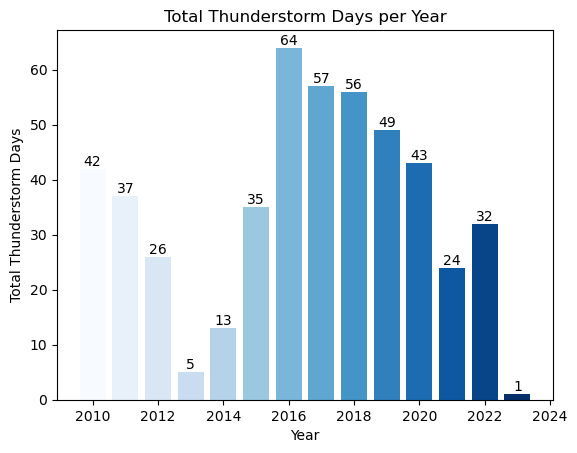

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# extract year information from the date
df["year"] = pd.to_datetime(df["DATE"]).dt.year

# calculate total thunderstorm days (TSTD) for each year
tstd = df.groupby("year")["DYTS"].sum()

# create a color gradient for the bars
# create a color gradient with shades of blue
colors = plt.cm.Blues(np.linspace(0, 1, len(tstd)))

# plot the TSTD for each year with color gradient and value labels
fig, ax = plt.subplots()
bars = ax.bar(tstd.index, tstd.values, color=colors)
plt.xlabel("Year")
plt.ylabel("Total Thunderstorm Days")
plt.title("Total Thunderstorm Days per Year")

# add value labels to the bars
for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width()/2.0, bar.get_height(), int(tstd.values[i]), ha='center', va='bottom', color='black')

plt.show()


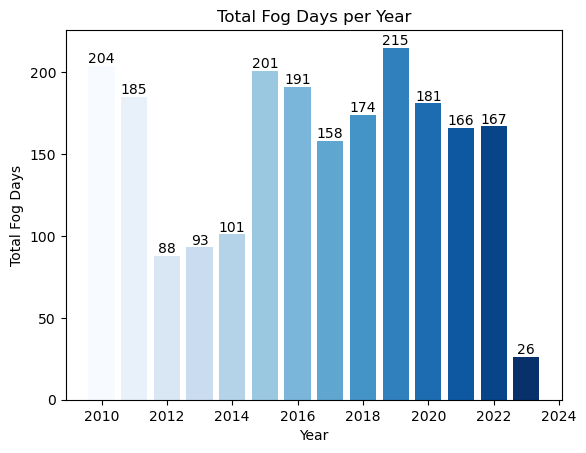

In [82]:
# calculate total fog days (DYFG) for each year
tstd = df.groupby("year")["DYFG"].sum()

# create a color gradient for the bars
colors = plt.cm.Blues(np.linspace(0, 1, len(tstd)))

# plot the TSTD for each year with color gradient and value labels
fig, ax = plt.subplots()
bars = ax.bar(tstd.index, tstd.values, color=colors)
plt.xlabel("Year")
plt.ylabel("Total Fog Days")
plt.title("Total Fog Days per Year")

# add value labels to the bars
for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width()/2.0, bar.get_height(), int(tstd.values[i]), ha='center', va='bottom', color='black')

plt.show()



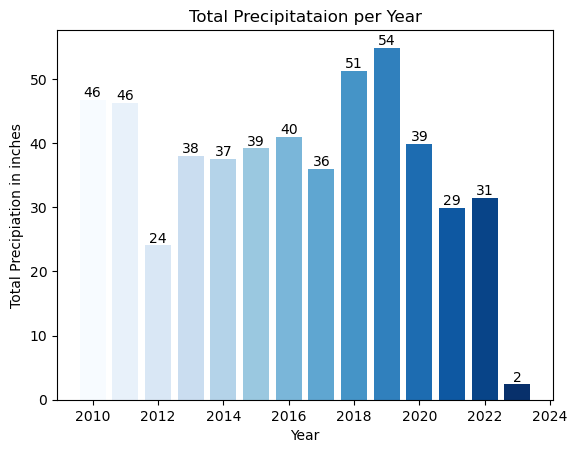

In [83]:
# calculate total precipation for each year
tstd = df.groupby("year")["PRCP"].sum()

# create a color gradient for the bars
colors = plt.cm.Blues(np.linspace(0, 1, len(tstd)))

# plot the TSTD for each year with color gradient and value labels
fig, ax = plt.subplots()
bars = ax.bar(tstd.index, tstd.values, color=colors)
plt.xlabel("Year")
plt.ylabel("Total Precipiation in inches")
plt.title("Total Precipitataion per Year")

# add value labels to the bars
for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width()/2.0, bar.get_height(), int(tstd.values[i]), ha='center', va='bottom', color='black')

plt.show()

#### METADATA
1. STATION (11 characters) is the station identification code. 
2. DATE is the year of the record (4 digits) followed by a month (2 digits). Year and month are separated by
    a dash. 
3. AWND = Monthly Average Wind Speed. Given in miles per hour (default) or meters per second
    depending on user specification for CSV output. Not included on PDF version. Missing if more than 5
    days within the month are missing or flagged or if more than 3 consecutive values within the month are
    missing or flagged. 
4. DYFG = Total number of days in the month with fog reported. Not included on PDF version
5. DYTS = Total number of days in the month where one or more thunderstorms were reported
6. PRCP = Total Monthly Precipitation. Given in inches for PDF output. CSV output is in inches (default) or
    millimeters depending on user specification. Measurement Flags: T is used for trace amount, a is used
    for any accumulation within a month that includes missing days. If no days are missing, no flag is used. 
7. TAVG = Average Monthly Temperature. Computed by adding the unrounded monthly mean maximum
    (TMAX) and monthly mean minimum (TMIN) temperatures and dividing by 2. Fahrenheit units on PDF
    output. CSV output is Fahrenheit (default) or Celsius units depending on user specification. Missing if
    more than 5 days within the month are missing or flagged or if more than 3 consecutive values within
    the month are missing or flagged.
8. TMAX = Monthly Maximum Temperature. Average of daily maximum temperature given in Fahrenheit
    on PDF output. CSV output is given in Fahrenheit (default) or Celsius depending on user specification.
    Missing if more than 5 days within the month are missing or flagged or if more than 3 consecutive values
    within the month are missing or flagged. 
9. TMIN = – Monthly Minimum Temperature. Average of daily minimum temperature given in Fahrenheit
    units on PDF output. CSV output is given in Fahrenheit (default) or Celsius units depending on user
    specification. Missing if more than 5 days within the month are missing or flagged or if more than 3
    consecutive values within the month are missing or flagged. 

### Data Clean

In [98]:
df = pd.read_csv(r'C:\Users\chris\DSC680-T301\DSC680-T301\Weather.csv', index_col='DATE', parse_dates=True) 
df.head()

,STATION,AWND,DYFG,DYTS,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,,,
2010-01-01,USW00094908,9.6,22.0,NaN,1.77,15.2,21.3,9.2
2010-02-01,USW00094908,8.3,18.0,NaN,0.86,20.4,28.5,12.3
2010-03-01,USW00094908,8.5,15.0,1.0,1.05,40.6,50.0,31.2
2010-04-01,USW00094908,11.2,9.0,4.0,5.78,53.9,64.7,43.0
2010-05-01,USW00094908,9.2,14.0,3.0,4.79,59.8,69.9,49.6


In [99]:
# Fill missing values with the mean of the previous and next months
df['TAVG'].fillna((df['TAVG'].shift() + df['TAVG'].shift(-1)) / 2, inplace=True)

In [100]:
df['DYTS'] = df['DYTS'].replace(np.nan, 0)
df['DYFG'] = df['DYFG'].replace(np.nan, 0)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 157 entries, 2010-01-01 to 2023-01-01
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  157 non-null    object 
 1   AWND     157 non-null    float64
 2   DYFG     157 non-null    float64
 3   DYTS     157 non-null    float64
 4   PRCP     157 non-null    float64
 5   TAVG     157 non-null    float64
 6   TMAX     156 non-null    float64
 7   TMIN     157 non-null    float64
dtypes: float64(7), object(1)
memory usage: 11.0+ KB


In [103]:
df

,STATION,AWND,DYFG,DYTS,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,,,
2010-01-01,USW00094908,9.6,22.0,0.0,1.77,15.2,21.3,9.2
2010-02-01,USW00094908,8.3,18.0,0.0,0.86,20.4,28.5,12.3
2010-03-01,USW00094908,8.5,15.0,1.0,1.05,40.6,50.0,31.2
2010-04-01,USW00094908,11.2,9.0,4.0,5.78,53.9,64.7,43.0
2010-05-01,USW00094908,9.2,14.0,3.0,4.79,59.8,69.9,49.6
...,...,...,...,...,...,...,...,...
2022-09-01,USW00094908,8.5,13.0,1.0,0.61,64.0,73.9,54.1
2022-10-01,USW00094908,9.6,10.0,3.0,0.98,50.1,62.6,37.6
2022-11-01,USW00094908,11.9,12.0,1.0,3.60,38.2,48.0,28.5


### Adfuller test ( Stationary vs Non stationary)

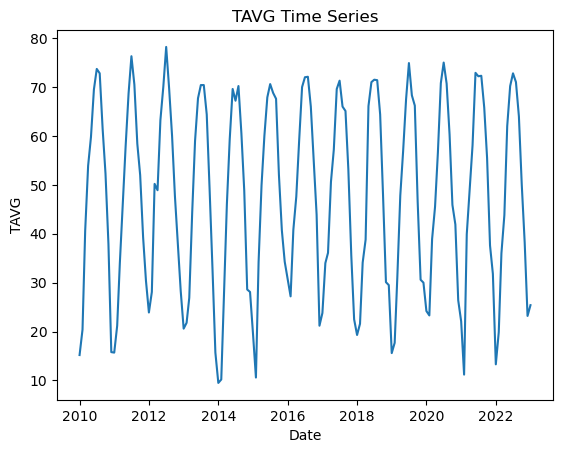

ADF Statistic: -2.368232
p-value: 0.150904
Critical Values:
	1%: -3.476
	5%: -2.882
	10%: -2.577


In [104]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Plot the TAVG time series
plt.plot(df['TAVG'])
plt.xlabel('Date')
plt.ylabel('TAVG')
plt.title('TAVG Time Series')
plt.show()

# Perform Augmented Dickey-Fuller test
result = adfuller(df['TAVG'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

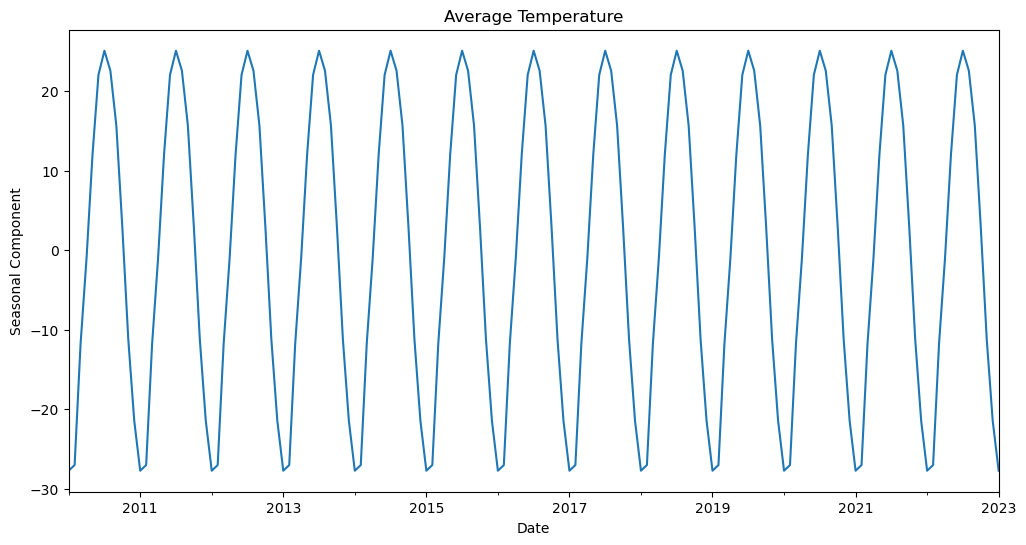

In [105]:
# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(df['TAVG'], model='additive', period=12)

# Plot the seasonal component
fig, ax = plt.subplots(figsize=(12,6))
decomposition.seasonal.plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Seasonal Component')
plt.title("Average Temperature")
plt.show()

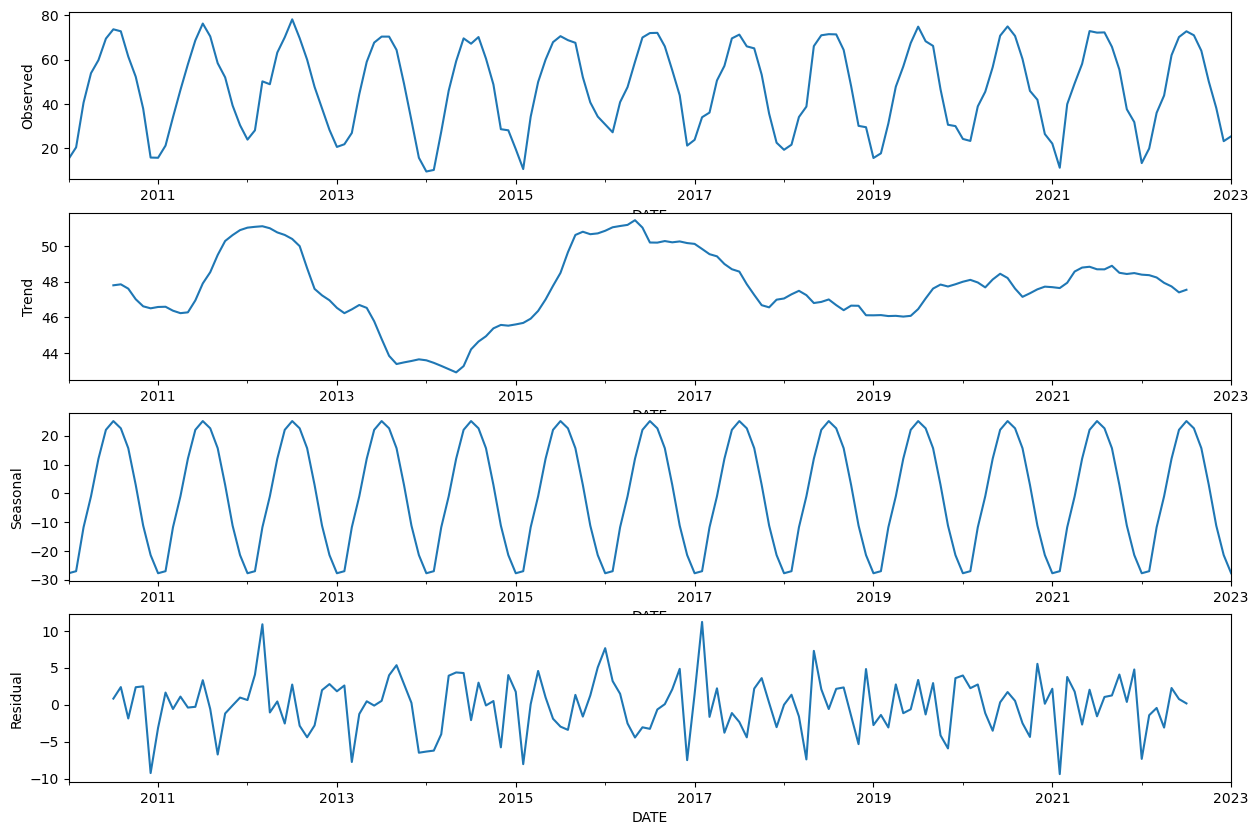

In [106]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(df['TAVG'], model='additive', period=12)

# Plot the decomposed components
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,10))
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.show()



In [107]:
# 12-month differencing

df['seasonal_diff_TAVG'] = df['TAVG'].diff(periods=12).dropna()


In [108]:
# Drop the NaN values in the differenced TAVG column

# Run the ADF test again
result = adfuller(df['seasonal_diff_TAVG'].dropna())

# Print the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.888782
p-value: 0.002119
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.578


### WITH EXOGENOUS VARIABLE 

In [109]:

# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to seasonal_diff_TAVG dataset
stepwise_fit = auto_arima(df['TAVG'], start_p = 1, start_q = 1,
						max_p = 3, max_q = 3, m = 12,
						start_P = 0, seasonal = True,
                        exogenous=  df[['AWND', 'PRCP','DYTS', 'DYFG']],
						d = 1, D = 1, trace = True,
						error_action ='ignore', # we don't want to know if an order does not work
						suppress_warnings = True, # we don't want convergence warnings
						stepwise = True)		 # set to stepwise

# To print the summary
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=992.094, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=936.303, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.28 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=954.450, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=920.047, Time=0.26 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.17 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=944.754, Time=0.11 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=904.044, Time=0.27 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=928.692, Time=0.10 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=1.29 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.56 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=900.057, Time=0.28 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=925.402, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  157
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -440.892
Date:                             Sun, 09 Apr 2023   AIC                            889.784
Time:                                     13:46:36   BIC                            901.664
Sample:                                 01-01-2010   HQIC                           894.611
                                      - 01-01-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7921      0.051    -15.581      0.000      -0.892      -0.692
ar.S.L12      -0.5150      0.076     -6.802      0.000      -0.663      -0.367
ar.S.L24      -0.4438      0.079     -5.622      0.000      -0.598      -0.289
sigma2        25.2903      2.838      8.913      0.000      19.729      30.852
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):                 1.64
Prob(Q):                              0.47   Prob(JB):                         0.44
Heteroskedasticity (H):               0.88   Skew:                            -0.08
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### WITHOUT EXOGENOUS VARIABLE

In [114]:
data_we = df.copy()
data_we.head()

,STATION,AWND,DYFG,DYTS,PRCP,TAVG,TMAX,TMIN,seasonal_diff_TAVG
DATE,,,,,,,,,
2010-01-01,USW00094908,9.6,22.0,0.0,1.77,15.2,21.3,9.2,NaN
2010-02-01,USW00094908,8.3,18.0,0.0,0.86,20.4,28.5,12.3,NaN
2010-03-01,USW00094908,8.5,15.0,1.0,1.05,40.6,50.0,31.2,NaN
2010-04-01,USW00094908,11.2,9.0,4.0,5.78,53.9,64.7,43.0,NaN
2010-05-01,USW00094908,9.2,14.0,3.0,4.79,59.8,69.9,49.6,NaN


In [115]:

# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to seasonal_diff_TAVG dataset
stepwise_fit = auto_arima(data_we['TAVG'], start_p = 1, start_q = 1,
						max_p = 3, max_q = 3, m = 12,
						start_P = 0, seasonal = True,
						d = 1, D = 1, trace = True,
						error_action ='ignore', # we don't want to know if an order does not work
						suppress_warnings = True, # we don't want convergence warnings
						stepwise = True)		 # set to stepwise

# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=992.094, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=936.303, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=954.450, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=920.047, Time=0.23 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.19 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=944.754, Time=0.13 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=904.044, Time=0.27 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=928.692, Time=0.10 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=1.28 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.55 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=900.057, Time=0.26 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=925.402, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  157
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -440.892
Date:                             Sun, 09 Apr 2023   AIC                            889.784
Time:                                     13:49:27   BIC                            901.664
Sample:                                 01-01-2010   HQIC                           894.611
                                      - 01-01-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7921      0.051    -15.581      0.000      -0.892      -0.692
ar.S.L12      -0.5150      0.076     -6.802      0.000      -0.663      -0.367
ar.S.L24      -0.4438      0.079     -5.622      0.000      -0.598      -0.289
sigma2        25.2903      2.838      8.913      0.000      19.729      30.852
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):                 1.64
Prob(Q):                              0.47   Prob(JB):                         0.44
Heteroskedasticity (H):               0.88   Skew:                            -0.08
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Based on the auto_arima function output, the best model for the provided dataset is an ARIMA(0,1,1)(2,1,0)[12] model, where:

1. p=3: The number of autoregressive terms in the non-seasonal component of the model
2. d=1: The number of differences applied to the time series to make it stationary
3. q=0: The number of moving average terms in the non-seasonal component of the model
4. P=2: The number of autoregressive terms in the seasonal component of the model
5. D=1: The number of differences applied to the seasonal component of the time series to make it stationary
6. Q=1: The number of moving average terms in the seasonal component of the model
7. m=12: The seasonal period, which is 12 for monthly data.
The fit time for the function is 16.795 seconds.

This model can be used for forecasting future values of the time series based on the provided historical data.

### TRAIN MODEL

In [116]:
# Split data into train / test sets
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:] # set one year(12 months) for testing


from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['TAVG'],
				order = (0,1,1),
				seasonal_order =(2, 1, 0, 12),
               exogenous=  df[['AWND', 'PRCP','DYTS', 'DYFG']]
               )

result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                TAVG   No. Observations:                  145
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -405.849
Date:                             Sun, 09 Apr 2023   AIC                            819.697
Time:                                     13:51:41   BIC                            831.228
Sample:                                 01-01-2010   HQIC                           824.383
                                      - 01-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7835      0.056    -14.097      0.000      -0.892      -0.675
ar.S.L12      -0.4611      0.085     -5.452      0.000      -0.627      -0.295
ar.S.L24      -0.4510      0.083     -5.449      0.000      -0.613      -0.289
sigma2        25.8607      3.014      8.580      0.000      19.953      31.768
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                 2.88
Prob(Q):                              0.32   Prob(JB):                         0.24
Heteroskedasticity (H):               0.94   Skew:                            -0.12
Prob(H) (two-sided):                  0.84   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### TEST MODEL

<AxesSubplot:xlabel='DATE'>

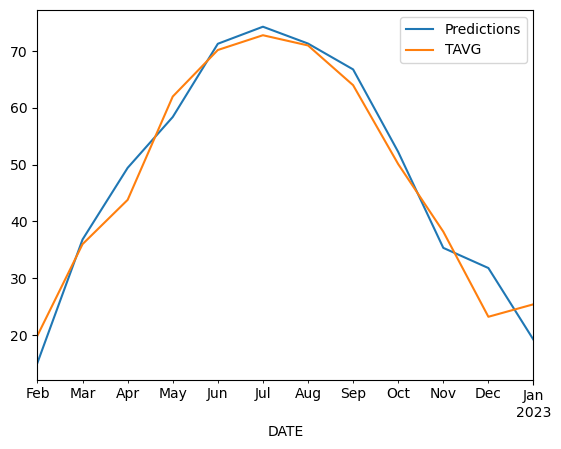

In [118]:
start = len(train)
end = len(train) + len(test) - 1


# Predictions for one-year against the test set
predictions = result.predict(start, end,
							type = 'levels').rename("Predictions")

# plot predictions and actual values
predictions.plot(legend = True)
# setting first name as index column
test['TAVG'].plot(legend = True)


###  Evaluate the model using MSE and RMSE

In [119]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["TAVG"], predictions)

# Calculate mean squared error
mean_squared_error(test["TAVG"], predictions)


17.097864893905818

###  Forecast using ARIMA Model

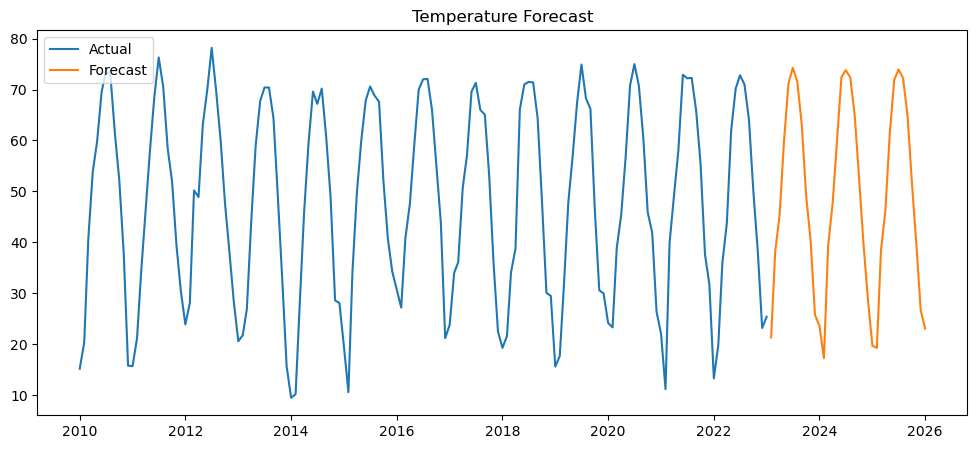

In [17]:
# Train the model on the full dataset
model = SARIMAX(df['TAVG'],
                order=(0, 1, 1),
                seasonal_order=(2, 1, 0, 12),
               exogenous=  df[['AWND', 'PRCP','DYTS', 'DYFG']])


result = model.fit()

# Forecast for the next 3 years
forecast = result.predict(start=len(df),
                          end=(len(df)-1) + 3 * 12,
                          typ='levels').rename('Forecast')

# Plot the forecast values
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(df.index, df['TAVG'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend(loc='upper left')
plt.title('Temperature Forecast')
plt.show()

